In [418]:
import numpy as np
import pandas as pd
data_ds = 'Cleaned_df_frame_US.csv'
df_US = pd.read_csv(data_ds)
df_US.index += 1
df_US.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
4,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
5,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [419]:
df_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 1 to 3040
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3040 non-null   int64 
 1   experience_level    3040 non-null   object
 2   employment_type     3040 non-null   object
 3   job_title           3040 non-null   object
 4   salary              3040 non-null   int64 
 5   salary_currency     3040 non-null   object
 6   salary_in_usd       3040 non-null   int64 
 7   employee_residence  3040 non-null   object
 8   remote_ratio        3040 non-null   int64 
 9   company_location    3040 non-null   object
 10  company_size        3040 non-null   object
dtypes: int64(4), object(7)
memory usage: 261.4+ KB


In [420]:
experience_level = df_US['experience_level'].value_counts ()
experience_level

experience_level
SE    2262
MI     497
EN     183
EX      98
Name: count, dtype: int64

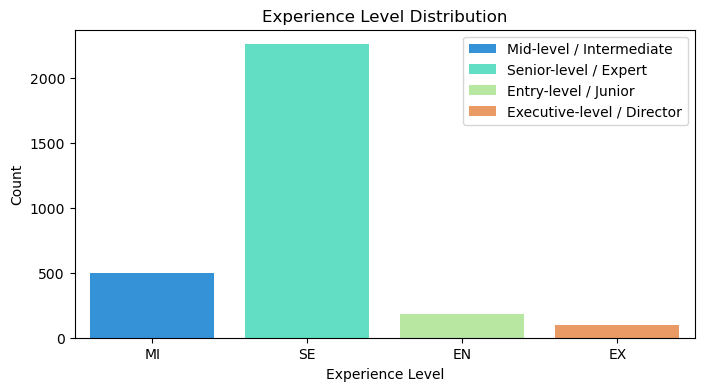

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='experience_level', hue='experience_level',data=df_US, palette='rainbow')
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
legend_labels = ['Mid-level / Intermediate', 'Senior-level / Expert','Entry-level / Junior','Executive-level / Director']
plt.legend(labels=legend_labels)
plt.show()

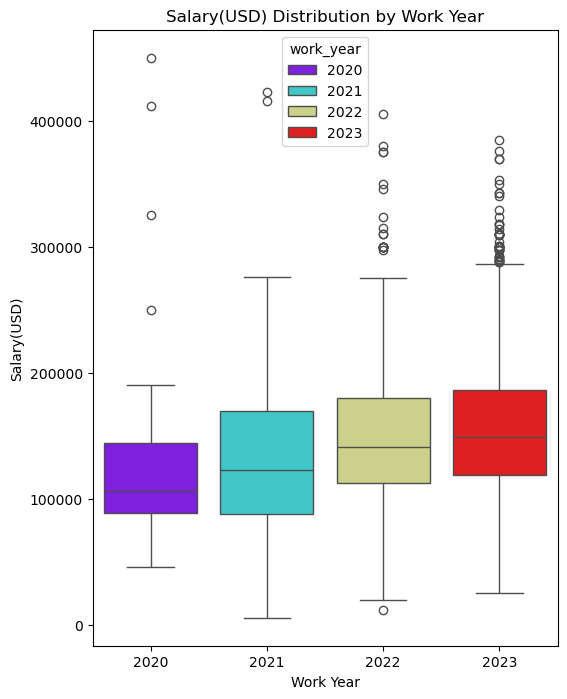

In [422]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='work_year', y='salary_in_usd', hue='work_year', data=df_US, palette=('rainbow'))
plt.title('Salary(USD) Distribution by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary(USD)')
plt.show()

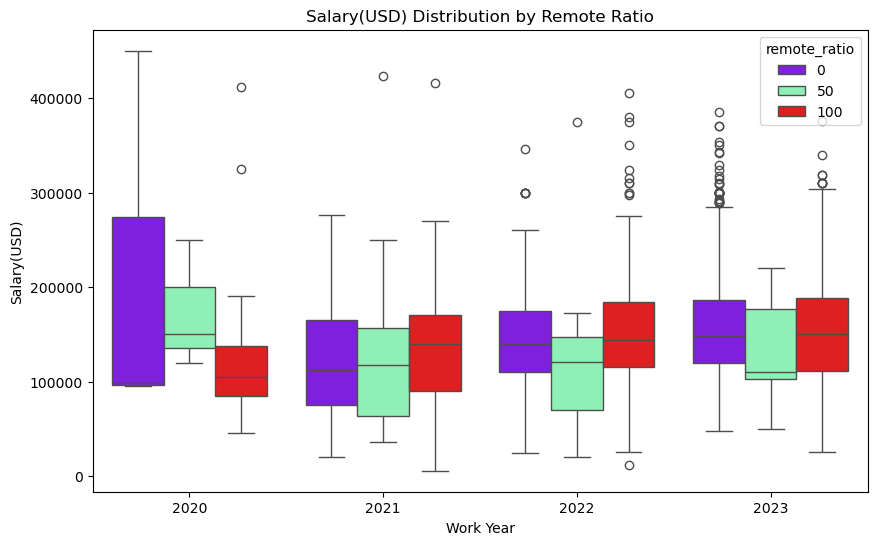

In [423]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', y='salary_in_usd', hue='remote_ratio', data=df_US, palette=('rainbow'))
plt.title('Salary(USD) Distribution by Remote Ratio')
plt.xlabel('Work Year')
plt.ylabel('Salary(USD)')
plt.show()

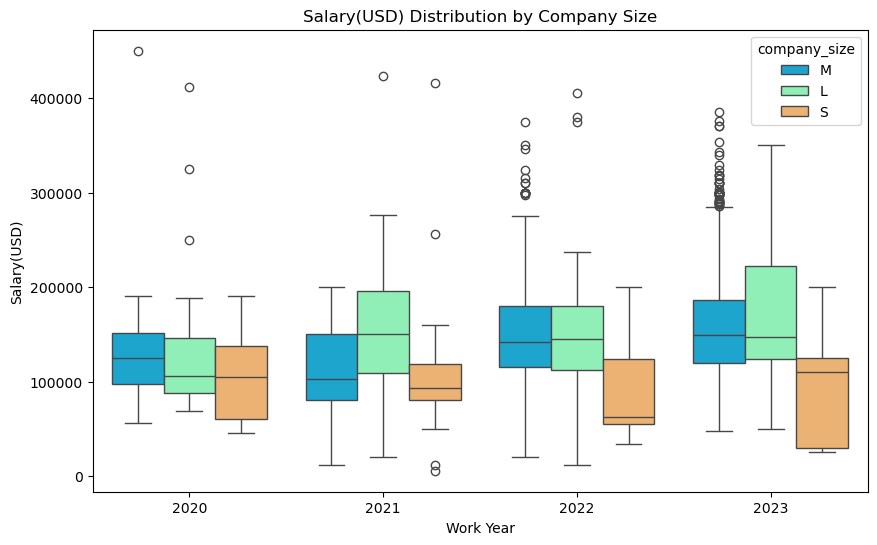

In [424]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', y='salary_in_usd', hue='company_size', data=df_US, palette=('rainbow'))
plt.title('Salary(USD) Distribution by Company Size')
plt.xlabel('Work Year')
plt.ylabel('Salary(USD)')
plt.show()

In [425]:
# Combine the job title with different name but actually the same job duty.
df_US['job_title'] = df_US['job_title'].str.replace('ML Engineer','Machine Learning Engineer')
df_US['job_title'] = df_US['job_title'].str.replace('Data Science Manager','Data Manager')
df_US['job_title'] = df_US['job_title'].str.replace('Data Analytics Manager','Data Manager')

In [426]:
job_title = df_US['job_title'].value_counts ()
job_title

job_title
Data Engineer                          907
Data Scientist                         674
Data Analyst                           525
Machine Learning Engineer              247
Data Manager                            97
                                      ... 
Data Scientist Lead                      1
Manager Data Management                  1
BI Data Engineer                         1
Principal Machine Learning Engineer      1
Staff Data Scientist                     1
Name: count, Length: 67, dtype: int64

In [427]:
# Make a subgroup with job_title counts 20 or more (ignore the job title which shows very rare)
sub_df_US = df_US[df_US.groupby('job_title').job_title.transform('count')>10].copy() 
# sub_df_US.info()
sub_job_title = sub_df_US['job_title'].value_counts ()
sub_job_title

job_title
Data Engineer                 907
Data Scientist                674
Data Analyst                  525
Machine Learning Engineer     247
Data Architect                 97
Data Manager                   97
Analytics Engineer             92
Applied Scientist              58
Research Scientist             58
Research Engineer              31
Machine Learning Scientist     21
Data Specialist                14
Data Science Consultant        14
BI Developer                   13
Computer Vision Engineer       12
Name: count, dtype: int64

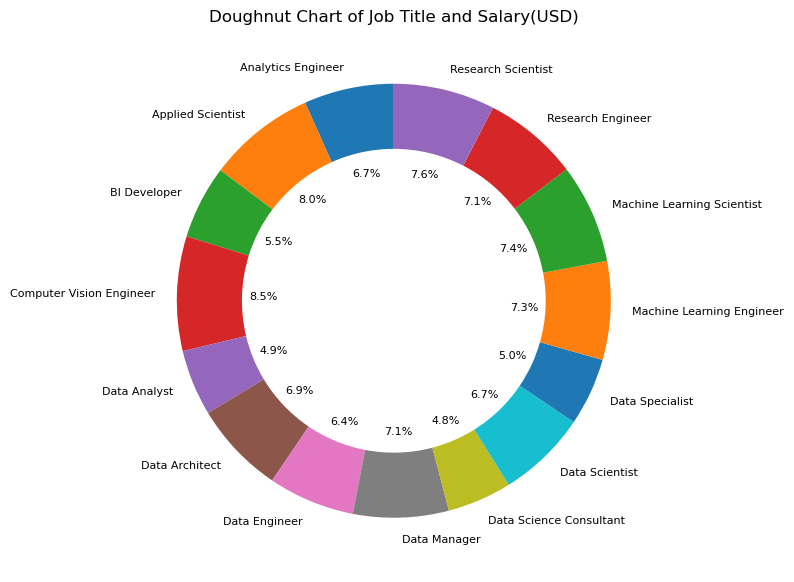

In [428]:
import matplotlib.pyplot as plt

# Calculate the average of salary(USD) for each job title (10 counts or more)
job_title_salary = sub_df_US.groupby('job_title')['salary_in_usd'].mean()

# Create the pie chart based on average salary(USD)
plt.figure(figsize=(7, 10))
plt.pie(job_title_salary, labels=job_title_salary.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 8})
plt.title('Doughnut Chart of Job Title and Salary(USD)')
plt.show()

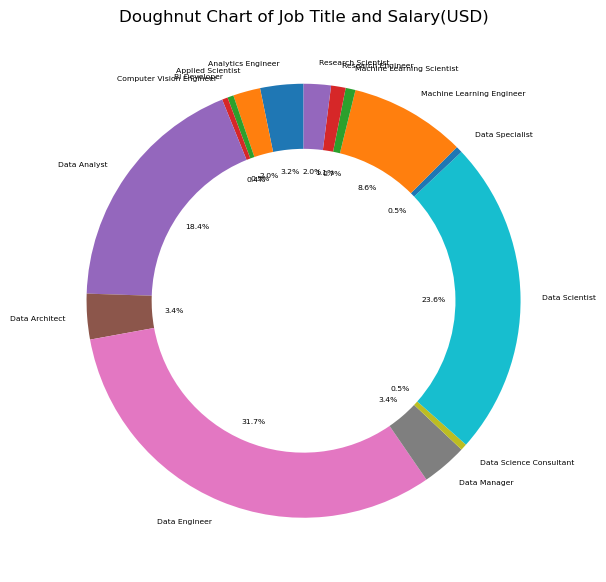

In [429]:
import matplotlib.pyplot as plt

# Calculate the average of salary(USD) for each job title (10 counts or more)
job_title_counts = sub_df_US.groupby('job_title')['job_title'].value_counts()

# Create the pie chart based on job title frequency
plt.figure(figsize=(7, 10))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 5.5})
plt.title('Doughnut Chart of Job Title and Salary(USD)')
plt.show()

In [430]:
# Make a subgroup with job_title counts 90 or more (Top 7) (ignore the job title which shows very rare)
sub_df_US_top7 = df_US[df_US.groupby('job_title').job_title.transform('count')>90].copy() 
# sub_df_US.info()
sub_job_title = sub_df_US_top7['job_title'].value_counts ()
sub_job_title

job_title
Data Engineer                907
Data Scientist               674
Data Analyst                 525
Machine Learning Engineer    247
Data Architect                97
Data Manager                  97
Analytics Engineer            92
Name: count, dtype: int64

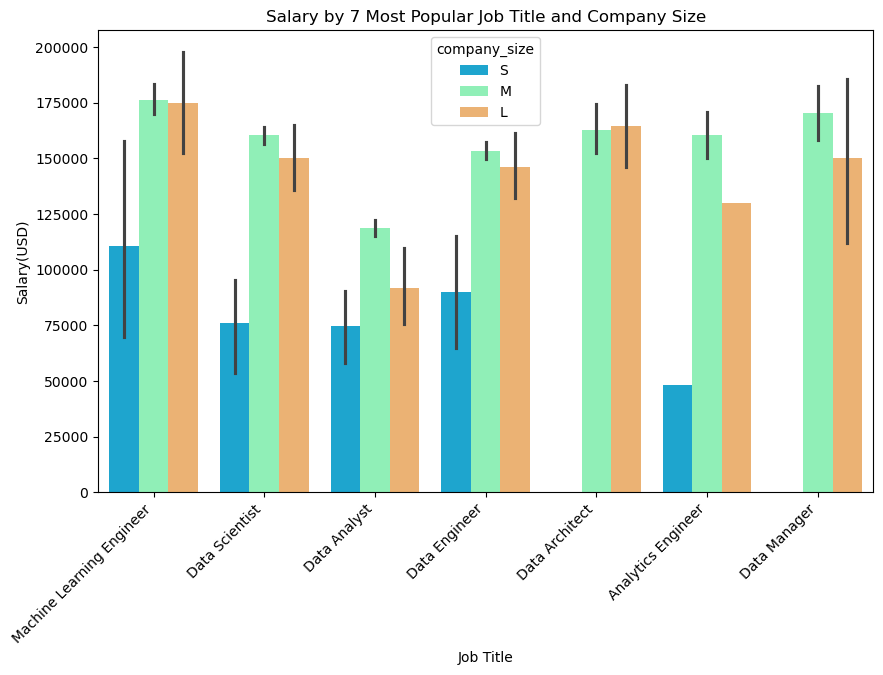

In [431]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary_in_usd', hue='company_size', data=sub_df_US_top6, palette=('rainbow'))
plt.title('Salary by 7 Most Popular Job Title and Company Size')
plt.xlabel('Job Title')
plt.ylabel('Salary(USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

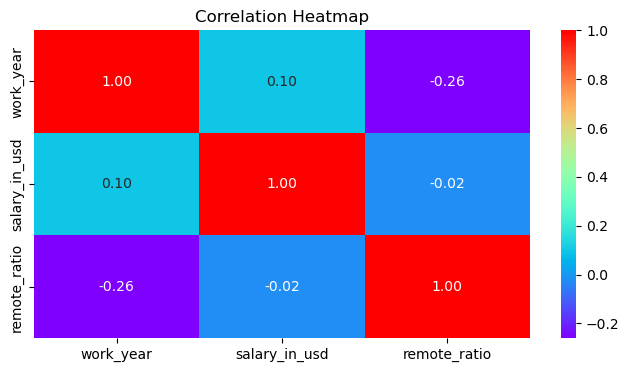

In [432]:
# prompt: take out salary from the correlation heatmap

# Calculate the correlation matrix, excluding non-numeric columns and 'salary'
correlation_matrix = df_US.drop('salary', axis=1).select_dtypes(include=['number']).corr()

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()